<h2 style="color:crimson">Tarea 3</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, f1_score
%config InlineBackend.figure_format = "retina"

In [2]:
# se abre el archivo a usar
import sys
sys.path.append("../Tarea/files")
import utils

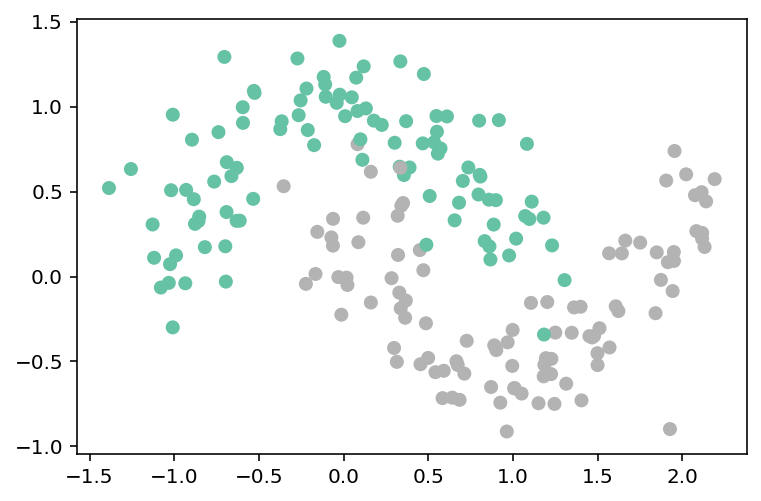

In [3]:
#se generan las x,y, x_test y y_test
noise = 0.2
X, y = make_moons(200, noise=noise , random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [4]:
#se realiza el model con Pipeline usando polinomio de grado 30 y Regresión Logística  
model =Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("lr", LogisticRegression(solver='lbfgs',penalty='none'))
])


In [5]:
# Se entrena el modelo
model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [6]:
#Se realiza un BaggingClassifier con 100 arboles y con remplazamiento 
from sklearn.ensemble import BaggingClassifier

bagging_logreg = BaggingClassifier(model,n_estimators=100,random_state=314, bootstrap=True, 
                                   max_samples=100, n_jobs=-1,oob_score=True)

bagging_logreg.fit(X, y)
bagging_logreg.oob_score_

0.95

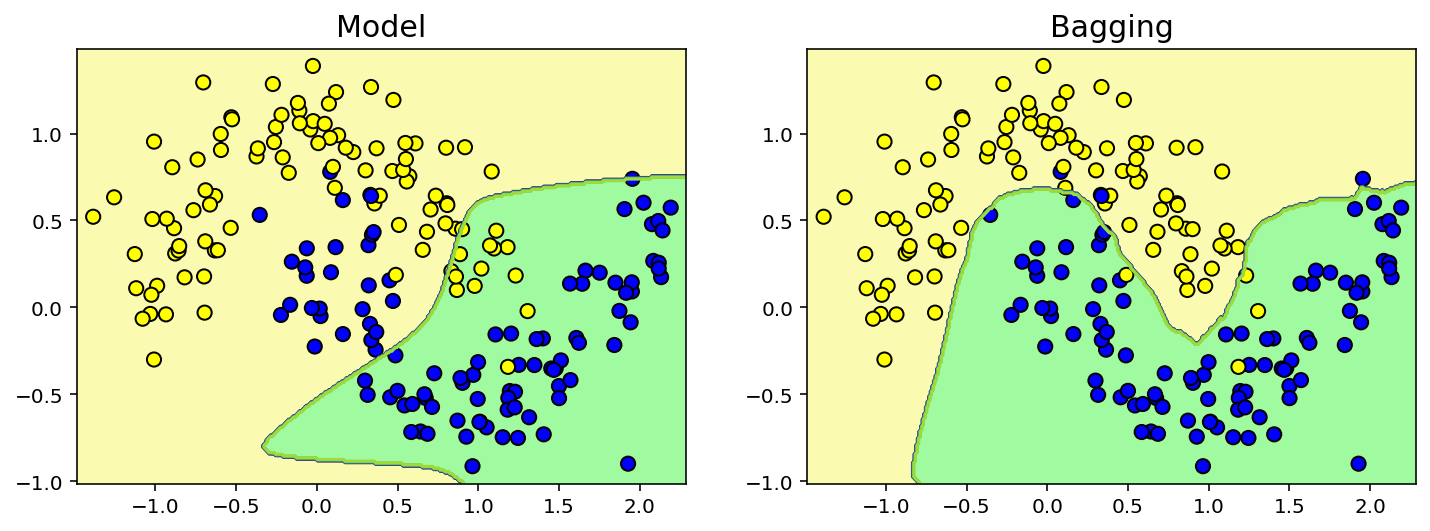

In [7]:
#Se grafica los dos modelos para conocer cual se ajusta más a los datos.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("Model",fontsize=15)
ax[1].set_title("Bagging",fontsize=15)
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

El modelo que se ajusta mejor a los datos es el bagging_logreg ya que sólo el 5% de los datos no se estiman correctamente. En cambio con el model no se ajusta adecuadamente a los datos, como se observa en las gráficas.

In [8]:
#se realiza la predicción con x_test
yhat = model.predict(X_test)
yhat_b=bagging_logreg.predict(X_test)

In [9]:
#se calcula el f1_score para model y bagging_logreg
f1_score(y_test, yhat)

0.7567567567567567

In [10]:
f1_score(y_test, yhat_b)

0.9500000000000001

El resultado que se obtuvo, fue que el modelo que se ajusta mejor es el "bagging_logreg" ya que su f1_score es del 95% de precisión en modelar los datos. Esto implica que es mucho mejor que el "model" ya que este tiene un f1_score de 75% de precisión, por lo cual no modela con mucha precisión (como se observa en las gráficas).